In [1]:
# For analysis and numerical functions
import pandas as pd
import numpy as np

# For Vizualization
import seaborn as sns
import matplotlib.pyplot as plt

# Extra
import warnings
warnings.filterwarnings(action='ignore')

# INTRODUCTION

#### In this assignment we need to build a model for the prediction of demand for shared bikes

## Problem Statement

#### A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

#### A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

#### In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

#### Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

## Business Goal:

#### It is required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

In [2]:
#Read the csv file using pandas
df=pd.read_csv("day (2).csv")
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [3]:
#Inspect first few rows
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Data Sanity Check

In [4]:
#Check the shape
df.shape

(730, 16)

In [5]:
#check dataframe for null and datatype 
df.info

<bound method DataFrame.info of      instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  01-01-2018       1   0     1        0        6           0   
1          2  02-01-2018       1   0     1        0        0           0   
2          3  03-01-2018       1   0     1        0        1           1   
3          4  04-01-2018       1   0     1        0        2           1   
4          5  05-01-2018       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
725      726  27-12-2019       1   1    12        0        4           1   
726      727  28-12-2019       1   1    12        0        5           1   
727      728  29-12-2019       1   1    12        0        6           0   
728      729  30-12-2019       1   1    12        0        0           0   
729      730  31-12-2019       1   1    12        0        1           1   

     weathersit       temp     atemp      hum  windspee

## Data Cleaning:


## Dropping Column

In [6]:
# Drop the unnecessary column 
dropp_col = ['instant','dteday','casual','registered']
df=df.drop(dropp_col, axis=1, )

# Data Missing value


In [7]:
#Checking the missing values
df.isnull().mean()

season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
cnt           0.0
dtype: float64

# EDA

In [8]:
df.nunique()


season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [9]:
# splitting the varaible into categorical and continous columns 
cat_cols = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
cont_cols = ['temp','atemp','hum','windspeed']
target = ['cnt']
len(cat_cols)+len(cont_cols)+len(target)

12

# Univariate Analysis

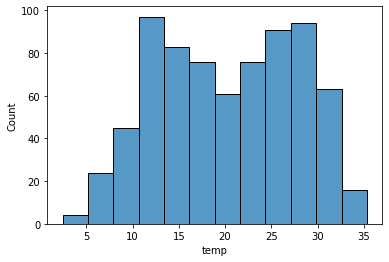

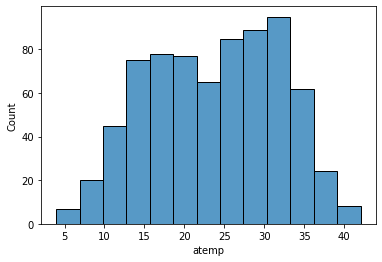

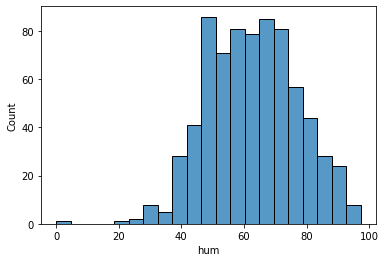

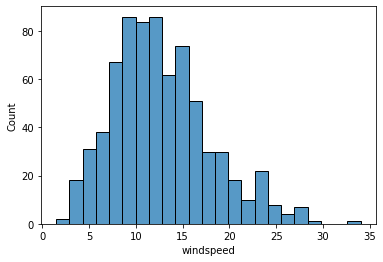

In [10]:
# using  histogram  for univaraite analysis on continuous column in loop
for i in cont_cols:
    sns.histplot(df[i])
    plt.show()

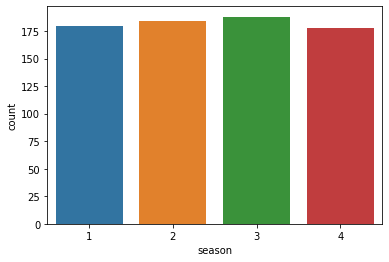

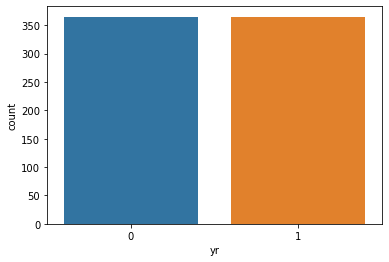

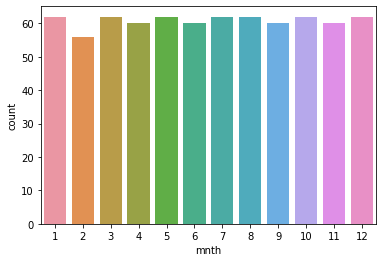

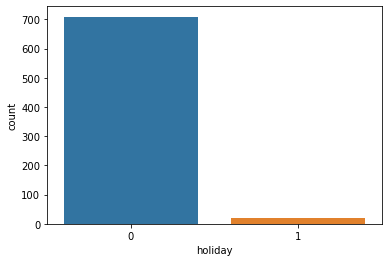

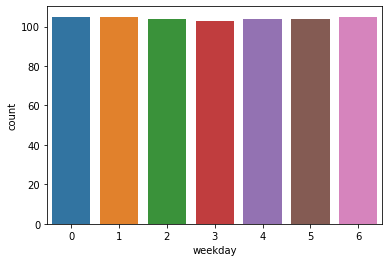

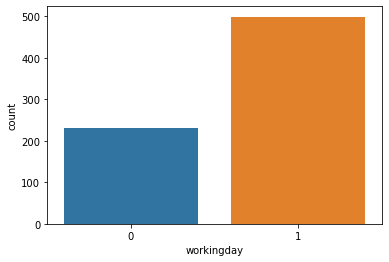

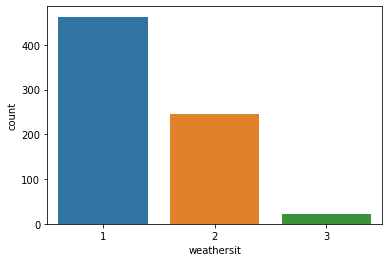

In [11]:
# showing countplot for univaraite categorical columns in loop 
for i in cat_cols:
    sns.countplot(df[i])
    plt.show()

# Bivariate Analysis

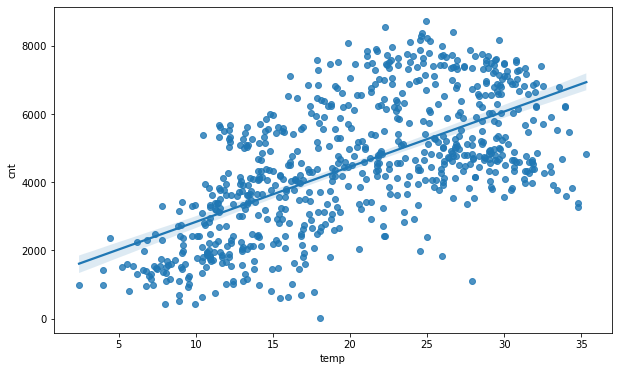

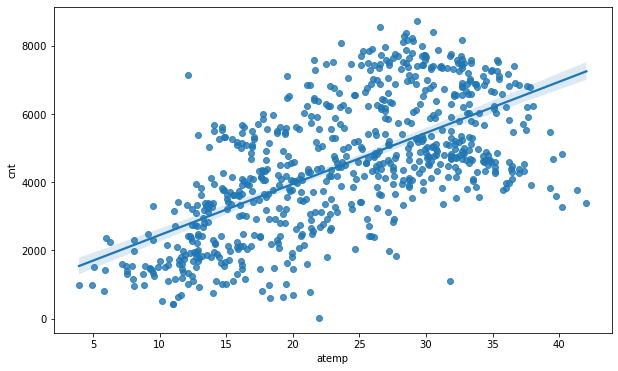

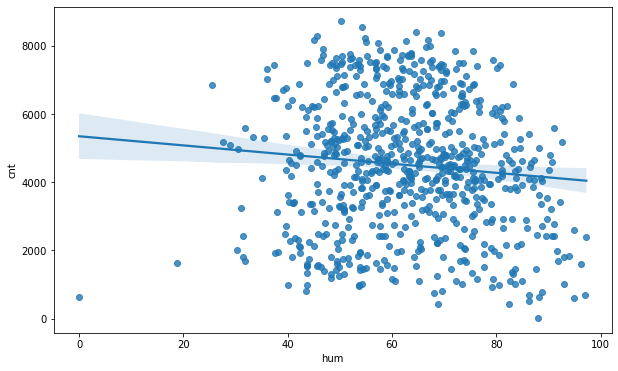

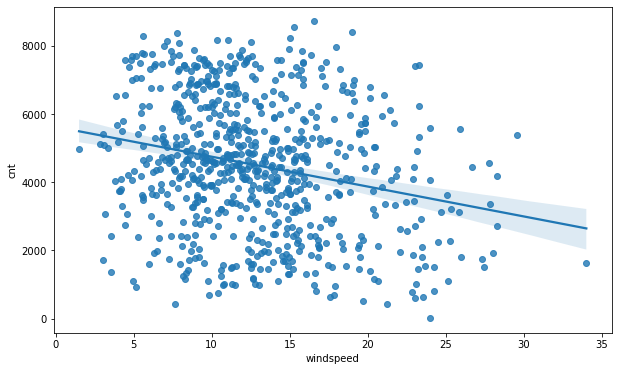

In [12]:
# using target varaible what relation with continous columns 
for i in cont_cols:
    plt.figure(figsize=(10,6))
    sns.regplot(df[i],df["cnt"])
    plt.show()

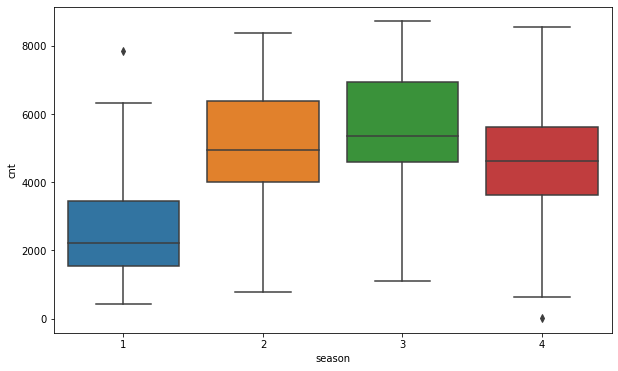

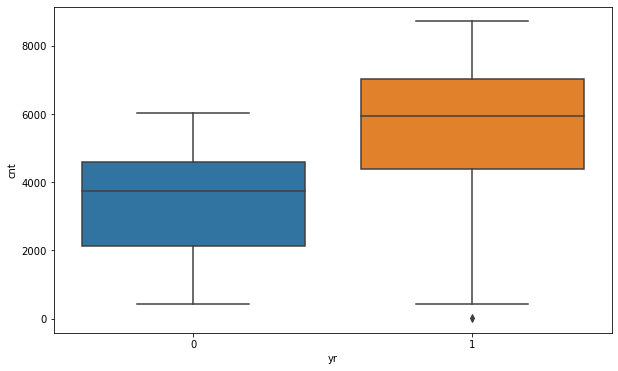

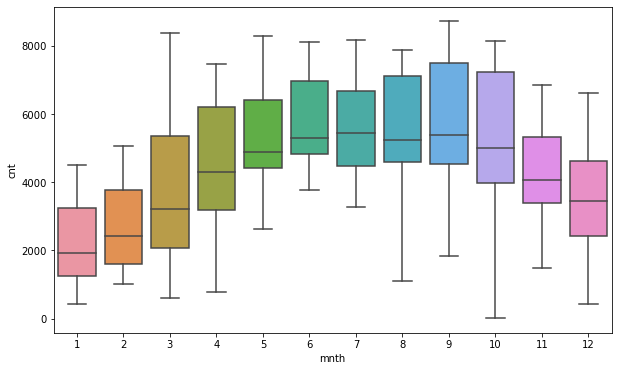

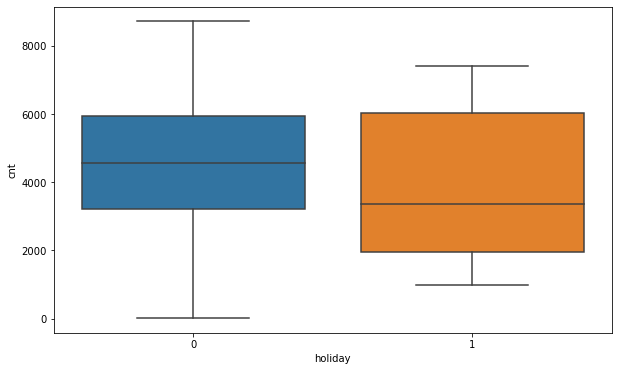

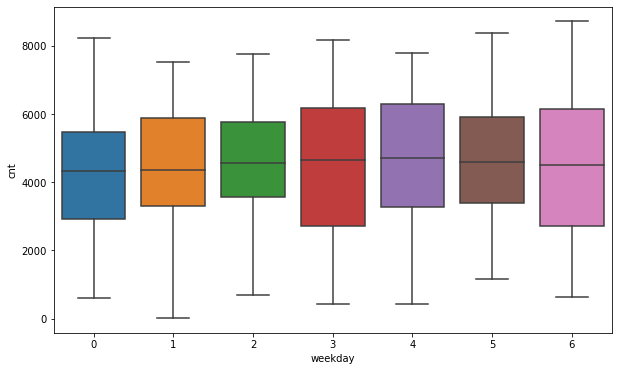

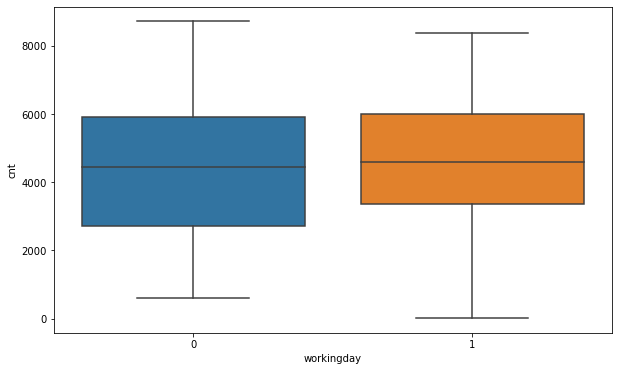

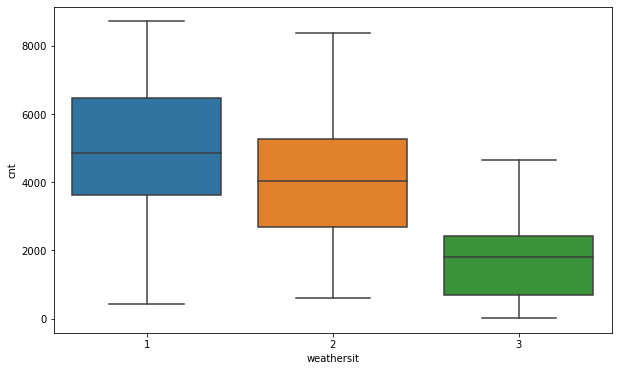

In [13]:
# Boxplot for categorical variables to see demands
for i in cat_cols:
    plt.figure(figsize=(10,6))
    sns.boxplot(df[i],df["cnt"])
    plt.show()

# Multivariate Analysis

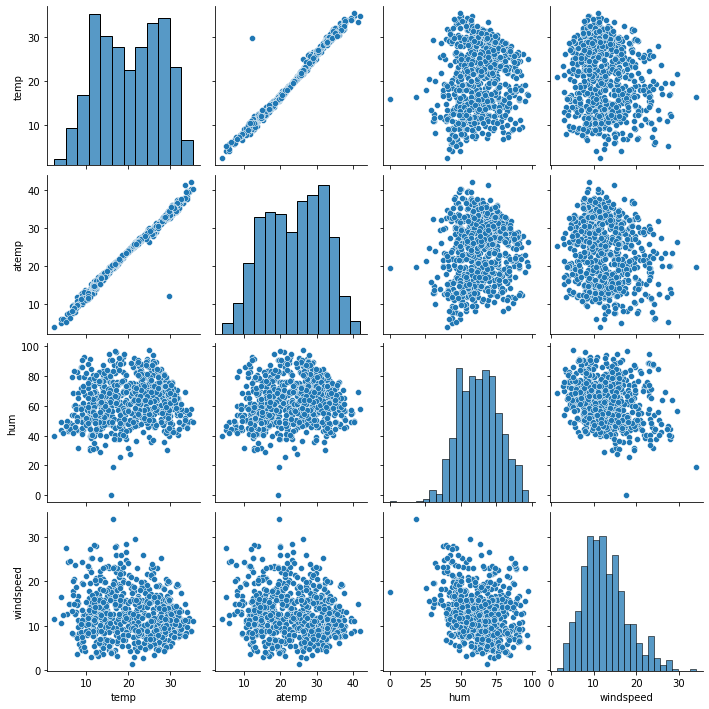

In [14]:
sns.pairplot(df[cont_cols])
plt.show()

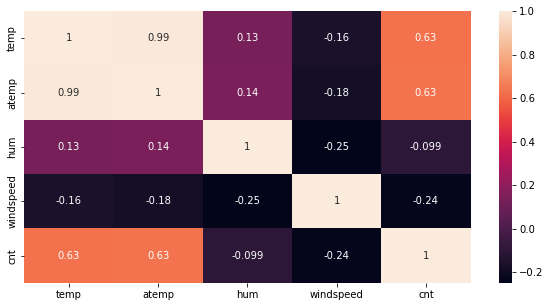

In [15]:
plt.figure(figsize=(10,5))
sns.heatmap(df[cont_cols+["cnt"]].corr(),annot=True)
plt.show()

#### Inference:

Looks like the temp and atemp has the highest corelation with the target variable cnt
temp and atemp are highly co-related with each other

## Pre Processing Steps

## Dummy Variable Creation

In [16]:
df[cat_cols].nunique()# Only for non binary categorical columns

season         4
yr             2
mnth          12
holiday        2
weekday        7
workingday     2
weathersit     3
dtype: int64

In [17]:
#Dummy variables for season, mnth, weekday, weathersit
season_dum = pd.get_dummies(df["season"],prefix="season",drop_first=True)
season_dum.head()

,season_2,season_3,season_4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [18]:
mnth_dum=pd.get_dummies(df["mnth"], prefix="mnth", drop_first=True)
mnth_dum.head()

,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [19]:
weekday_dum=pd.get_dummies(df["weekday"], prefix="weekday", drop_first=True)
weekday_dum.head()

,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0


In [20]:
weathersit_dum=pd.get_dummies(df["weathersit"], prefix="weathersit", drop_first=True)
weathersit_dum.head()

,weathersit_2,weathersit_3
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [21]:
df1=pd.concat([df,season_dum,mnth_dum,weekday_dum,weathersit_dum],axis=1)
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,0,1,1,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,0,0,1,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,0,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,0,0,0


In [22]:
df1=df1.drop(["season","mnth","weekday","weathersit"],axis=1)


In [23]:
df1.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,0,0,0


## Train-Test Split

In [24]:
# splitting the independent and dependent varaible
X=df1.drop(["cnt"],axis=1)
y=df1["cnt"]

In [25]:
# code for taking train and test data 
from sklearn.model_selection import train_test_split
#Train Test split with 70:30 ratio
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [26]:
X_train.shape

(511, 29)

In [27]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
653,1,0,1,19.201653,23.0423,55.8333,12.208807,0,0,1,...,0,0,0,1,0,0,0,0,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,0,1,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,0,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,0,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,1,0,0,...,0,0,0,0,0,0,0,1,1,0


In [28]:
X_test.shape

(219, 29)

# Scaling

In [29]:
#Standardization
#z=x-xmean/sigma
X_train=(X_train-X_train.mean())/X_train.std()

In [30]:
X_test=(X_test-X_test.mean())/X_test.std()

## Modelling

## Feature Selection

In [31]:
# import library  of RFE and linear regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# here taking estimator for linear regression and RFE to select number of feature to choose by dropping other
estimator=LinearRegression()
selector=RFE(estimator,n_features_to_select=15)

# selector select the feature we want from train data
selector=selector.fit(X_train,y_train)
selector.support_

array([ True, False,  True,  True, False,  True,  True,  True,  True,
        True, False,  True, False, False, False, False,  True,  True,
        True, False, False, False, False, False, False, False,  True,
        True,  True])

In [32]:
selected_features=list(X_train.columns[selector.support_])
selected_features

['yr',
 'workingday',
 'temp',
 'hum',
 'windspeed',
 'season_2',
 'season_3',
 'season_4',
 'mnth_3',
 'mnth_8',
 'mnth_9',
 'mnth_10',
 'weekday_6',
 'weathersit_2',
 'weathersit_3']

In [33]:
# taking the feature in train an test data we choose by RFE
X_train=X_train[selected_features]
X_test=X_test[selected_features]

In [34]:
import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train)
X_test_sm=sm.add_constant(X_test)

In [35]:
# making model for prediction
model1=sm.OLS(y_train,X_train_sm)
res1=model1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.4
Date:                Thu, 11 May 2023   Prob (F-statistic):          1.66e-191
Time:                        15:36:23   Log-Likelihood:                -4114.9
No. Observations:                 511   AIC:                             8262.
Df Residuals:                     495   BIC:                             8330.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4491.3033     34.173    131.430      0.000    4424.162    4558.445
yr            1003.9270     34.826     28.827      0.000     935.502    1072.352
workingday     210.7202     44.093      4.779      0.000     124.087     297.354
temp           967.3093     65.947     14.668      0.000     837.738    1096.881
hum           -203.0978     47.323     -4.292      0.000    -296.077    -110.119
windspeed     -273.2240     37.467     -7.292      0.000    -346.837    -199.611
season_2       464.1224     55.751      8.325      0.000     354.584     573.660
season_3       149.9144     85.735      1.749      0.081     -18.535     318.363
season_4       563.0300     52.322     10.761      0.000     460.229     665.831
mnth_3          69.2141     36.961      1.873      0.062      -3.405     141.833
mnth_8         120.6945     44.386      2.719      0.007      33.486     207.903
mnth_9         272.7055     40.396      6.751      0.000     193.336     352.075
mnth_10        112.3184     42.156      2.664      0.008      29.493     195.144
weekday_6      189.1568     43.947      4.304      0.000     102.810     275.503
weathersit_2  -240.1159     42.902     -5.597      0.000    -324.408    -155.824
weathersit_3  -372.5136     38.518     -9.671      0.000    -448.193    -296.834
==============================================================================
Omnibus:                       86.041   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              229.344
Skew:                          -0.832   Prob(JB):                     1.58e-50
Kurtosis:                       5.829   Cond. No.                         5.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train.columns

vif_data["VIF"]=[variance_inflation_factor(X_train.values,i) for i in range(len(X_train.columns))]
vif_data

,Feature,VIF
0,yr,1.036581
1,workingday,1.661651
2,temp,3.716944
3,hum,1.913972
4,windspeed,1.199725
5,season_2,2.656429
6,season_3,6.282110
7,season_4,2.339727
8,mnth_3,1.167527
9,mnth_8,1.683775


In [37]:
X_train=X_train.drop(["season_3"],axis=1)
X_test=X_test.drop(["season_3"],axis=1)

In [38]:
X_train_sm=sm.add_constant(X_train)
X_test_sm=sm.add_constant(X_test)

In [39]:
model2=sm.OLS(y_train,X_train_sm)
res2=model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.6
Date:                Thu, 11 May 2023   Prob (F-statistic):          5.29e-192
Time:                        15:37:49   Log-Likelihood:                -4116.5
No. Observations:                 511   AIC:                             8263.
Df Residuals:                     496   BIC:                             8326.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4491.3033     34.243    131.158      0.000    4424.023    4558.584
yr             998.8278     34.776     28.722      0.000     930.502    1067.154
workingday     211.1318     44.184      4.778      0.000     124.320     297.943
temp          1053.8479     43.676     24.129      0.000     968.035    1139.661
hum           -215.0261     46.926     -4.582      0.000    -307.224    -122.828
windspeed     -278.9240     37.402     -7.457      0.000    -352.410    -205.438
season_2       396.6221     40.308      9.840      0.000     317.427     475.817
season_4       518.6214     45.840     11.314      0.000     428.557     608.686
mnth_3          56.3343     36.294      1.552      0.121     -14.975     127.644
mnth_8         148.6580     41.491      3.583      0.000      67.139     230.177
mnth_9         295.8286     38.250      7.734      0.000     220.677     370.980
mnth_10        102.4396     41.862      2.447      0.015      20.191     184.688
weekday_6      189.1058     44.038      4.294      0.000     102.581     275.631
weathersit_2  -234.8246     42.884     -5.476      0.000    -319.081    -150.568
weathersit_3  -364.7199     38.339     -9.513      0.000    -440.047    -289.393
==============================================================================
Omnibus:                       77.456   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.113
Skew:                          -0.772   Prob(JB):                     7.06e-43
Kurtosis:                       5.595   Cond. No.                         2.67
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
X_train=X_train.drop(["mnth_3"],axis=1)
X_test=X_test.drop(["mnth_3"],axis=1)

In [41]:
X_train_sm=sm.add_constant(X_train)
X_test_sm=sm.add_constant(X_test)

In [42]:
model3=sm.OLS(y_train,X_train_sm)
res3=model3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     210.9
Date:                Thu, 11 May 2023   Prob (F-statistic):          1.18e-192
Time:                        15:38:20   Log-Likelihood:                -4117.7
No. Observations:                 511   AIC:                             8263.
Df Residuals:                     497   BIC:                             8323.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4491.3033     34.292    130.972      0.000    4423.928    4558.679
yr             999.5471     34.822     28.704      0.000     931.131    1067.964
workingday     215.2474     44.167      4.873      0.000     128.470     302.025
temp          1043.7796     43.253     24.132      0.000     958.798    1128.761
hum           -216.2355     46.986     -4.602      0.000    -308.551    -123.920
windspeed     -275.4992     37.390     -7.368      0.000    -348.961    -202.038
season_2       396.3534     40.365      9.819      0.000     317.047     475.660
season_4       504.5449     44.998     11.213      0.000     416.136     592.954
mnth_8         143.8956     41.436      3.473      0.001      62.485     225.307
mnth_9         292.2014     38.232      7.643      0.000     217.084     367.319
mnth_10        103.3359     41.917      2.465      0.014      20.979     185.692
weekday_6      192.5367     44.045      4.371      0.000     105.999     279.075
weathersit_2  -234.6177     42.944     -5.463      0.000    -318.992    -150.243
weathersit_3  -362.6889     38.371     -9.452      0.000    -438.078    -287.300
==============================================================================
Omnibus:                       76.792   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.552
Skew:                          -0.750   Prob(JB):                     1.71e-44
Kurtosis:                       5.686   Cond. No.                         2.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,1.000000
1,yr,1.029130
2,workingday,1.655620
3,temp,1.587797
4,hum,1.873683
5,windspeed,1.186500
6,season_2,1.382810
7,season_4,1.718468
8,mnth_8,1.457186
9,mnth_9,1.240587


# Model is ready

In [44]:
predicted_value=res3.predict(X_test_sm)

In [45]:
from sklearn.metrics import r2_score
print("Test Performance:",round(r2_score(y_test, predicted_value)*100,2),"%")

Test Performance: 81.04 %


In [46]:
# R-SQUARE OF TRAIN DATA 
predicted_value1=res3.predict(X_train_sm)
print("Train Performance:",round(r2_score(y_train, predicted_value1)*100,2),"%")

Train Performance: 84.65 %


In [47]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2_score(y_test, predicted_value))*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7984


# Model Evaluation

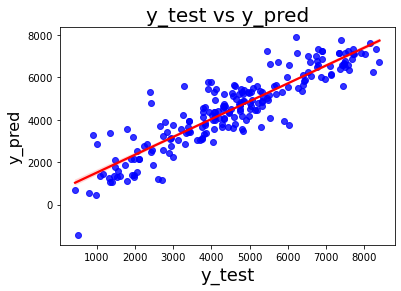

In [48]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=predicted_value, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

# Conclusion:

#### On analysing data, it was observed that, the linear regression model was able to predict bike demand precisely with an R2 Score of more than 80%